In [261]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [262]:
data = pd.read_csv('Mendota_Ice.csv')
year_min = data.loc[0, 'START YEAR']
year_max = data.loc[len(data)-1, 'START YEAR']
data

,START YEAR,END YEAR,CLOSED,OPENED,DAYS
0,1855,1856,18 Dec,14 Apr,118
1,1856,1857,6 Dec,6 May,151
2,1857,1858,25 Nov,26 Mar,121
3,1858,1859,8 Dec,14 Mar,96
4,1859,1860,7 Dec,26 Mar,110
5,1860,1861,14 Dec,10 Apr,117
6,1861,1862,2 Dec,13 Apr,132
7,1862,1863,26 Dec,9 Apr,104
8,1863,1864,18 Dec,21 Apr,125
9,1864,1865,8 Dec,5 Apr,118


In [263]:
def get_num(s):
    # returns day of year 
    months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Nov':11, 'Dec': 12}
    month_lens = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    date, month = s.split(' ')
    month = months[month]
    num = 0
    #START COUNTING AT NOV
    if month>=11:
        r = range(11, month)
    else:
        num+=61
        r = range(1, month)
    for x in r:
        num+=month_lens[x]
    num += int(date)
    return num

In [289]:
plot_data = pd.DataFrame(columns=['year', 'ice_start', 'ice_end', 'num_days',
                                  'n_year_avg_num_days', 'n_year_avg_ice_start', 'n_year_avg_ice_end'])

for y in range(1855, 2018):
    d_new = data[data['START YEAR'] == y]
    plot_data = plot_data.append({'year':y, 
                                  'ice_start':list(map(get_num, d_new['CLOSED'].values)),
                                  'ice_end':list(map(get_num, d_new['OPENED'].values)),
                                  'num_days':int(d_new['DAYS'].values[-1])
                                 }, ignore_index=True)

In [290]:
plot_data

,year,ice_start,ice_end,num_days,n_year_avg_num_days,n_year_avg_ice_start,n_year_avg_ice_end
0,1855,[48],[165],118,NaN,NaN,NaN
1,1856,[36],[187],151,NaN,NaN,NaN
2,1857,[25],[146],121,NaN,NaN,NaN
3,1858,[38],[134],96,NaN,NaN,NaN
4,1859,[37],[146],110,NaN,NaN,NaN
5,1860,[44],[161],117,NaN,NaN,NaN
6,1861,[32],[164],132,NaN,NaN,NaN
7,1862,[56],[160],104,NaN,NaN,NaN
8,1863,[48],[172],125,NaN,NaN,NaN
9,1864,[38],[156],118,NaN,NaN,NaN


In [280]:
def rolling_avg(col_val, opt=0):
    for row in range(163):
        n = row
        s = 0
        while n>-1 and (row-n)<5:
            r = plot_data.loc[n, col_val]
            r = r[opt] if type(r)==list else r
            s += r
            n -= 1
        s /= (row-n)
        plot_data.loc[row, ('n_year_avg_'+col_val)] = s

In [281]:
rolling_avg('num_days')
rolling_avg('ice_start', 0)
rolling_avg('ice_end', -1)

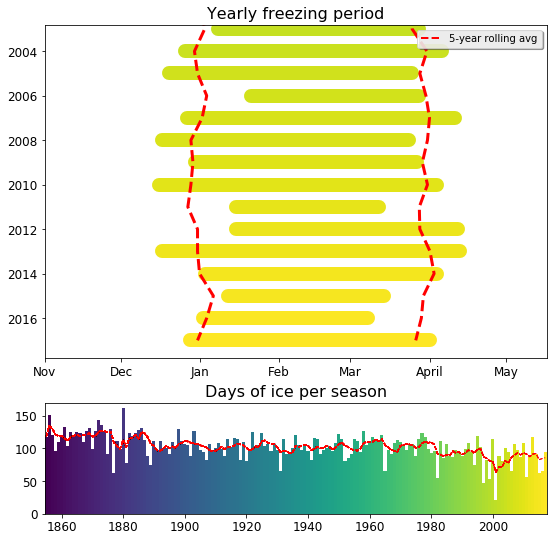

In [285]:
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import lines

f_title = 16
f_label = 12
n_frames = 5

plt.figure(figsize=(9,9))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1], width_ratios=[3])
bar_graph = plt.subplot(gs[1])
plt.xlim(year_min-.5, year_max+.5)
plt.ylim(0, 170)
plt.xticks(fontsize=f_label)
plt.yticks(fontsize=f_label)
plt.title('Days of ice per season', fontsize=f_title)
line_graph = plt.subplot(gs[0])
#min:23, max: 187
plt.xlim(0, 197)
plt.xticks([0, 30, 61, 92, 120, 151, 181], ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'April', 'May'], fontsize=f_label)
plt.title('Yearly freezing period', fontsize=f_title)
plt.legend(handles=[lines.Line2D([], [], linewidth=2, linestyle='--', color='r', label='5-year rolling avg')],
           loc='upper right', shadow=True, framealpha=0.8)
for x in ['n_year_avg_ice_start', 'n_year_avg_ice_end']:
    line_graph.plot(list(plot_data[x]), list(plot_data['year']), color='r', linestyle='--', zorder=2, linewidth=3)
for idx, row in plot_data.iterrows():
    year = row['year']
    for x1, x2 in zip(row['ice_start'], row['ice_end']):
        line_graph.plot([x1, x2], [year]*2, linewidth=14, solid_capstyle='round',
                        c=cm.viridis((year-year_min)/(year_max-year_min)), zorder=1)
    #bar_graph.bar(np.arange(1855, (year+1)), list(plot_data.loc[0:(year-year_min), 'num_days']))
    bar_graph.bar(year, plot_data.loc[(year-year_min), 'num_days'], width=1,
                  color=cm.viridis((year-year_min)/(year_max-year_min)), zorder=1)
    bar_graph.plot(np.arange(year_min, (year+1)),list(plot_data.loc[0:(year-year_min), 'n_year_avg_num_days']),
                   zorder=2, color='r', linestyle='--', linewidth=1)
    for f in range(n_frames):
        plt.ylim(year+(f/n_frames), year-15+(f/n_frames))
        plt.yticks(fontsize=f_label)
        plt.savefig('img/'+str(year)+str(f)+'.png')

In [286]:
#make animated visualizations 
import glob
import moviepy.editor as mpy

gif_name = 'lake.gif'
fps = 11
file_list = glob.glob('img/*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('/')[1].split('.')[0])) # Sort the images by #, this may need to be tweaked for your use case
for x in range(11): #to make last frame longer
    file_list.append(file_list[-1])
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif(gif_name, fps=fps)
    
#original source: http://superfluoussextant.com/making-gifs-with-python.html


[MoviePy] Building file lake.gif with imageio


100%|██████████| 827/827 [00:55<00:00, 15.00it/s]
